In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tf.__version__

'2.15.0'

In [3]:
%load_ext tensorboard

In [4]:
logdir = 'log'

In [11]:
#Algoritmo de treinamento rodando com 10 classes do Mnist

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28,1))
test_images = test_images.reshape(10000, 28, 28, 1)

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x=train_images, 
         y=train_labels,
         epochs=5,
         validation_data=(test_images, test_labels))


Epoch 1/5


1875/1875 [==============================] - 10s 5ms/step - loss: 0.1446 - accuracy: 0.9553 - val_loss: 0.0461 - val_accuracy: 0.9842
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0457 - accuracy: 0.9854 - val_loss: 0.0333 - val_accuracy: 0.9891
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0297 - val_accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0288 - val_accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0294 - val_accuracy: 0.9916


In [26]:
y_true = test_labels

# A uma substituiçao do predict_classes para as duas variáveis abaixo, devido não estar mais disponível na versão recente do TensorFlow
#Agora se utiliza do model.predict para trazer a probabilidade de pertencimento
# e np.argmax para trazer a maior probabilidade de acordo com o modelo

y_pred_probabilities = model.predict(test_images)
Y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

313/313 [==============================] - 1s 2ms/step


In [27]:
classes = [0,1,2,3,4,5,6,7,8,9]

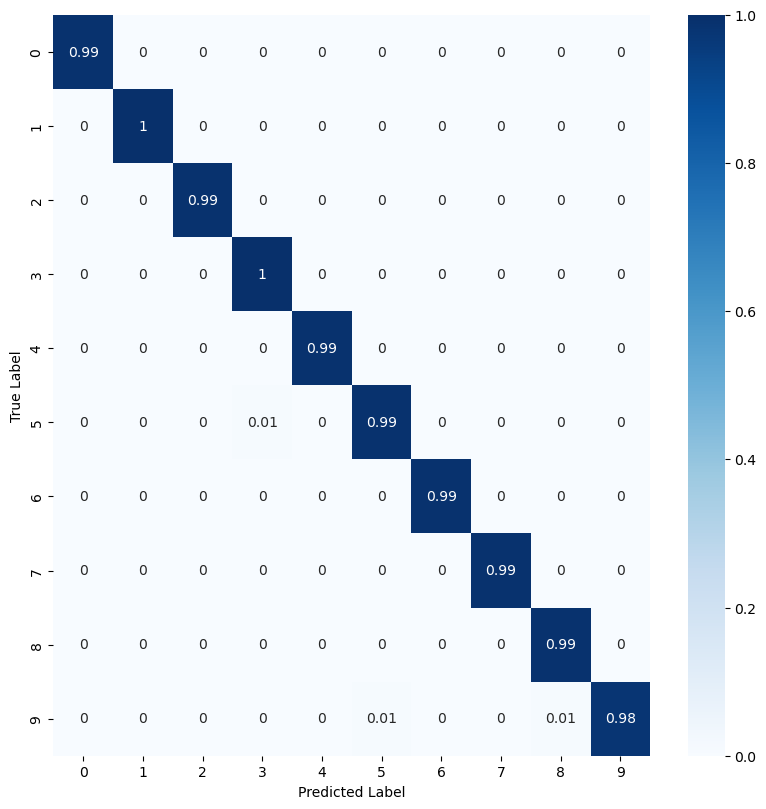

In [31]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=Y_pred_classes).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:,np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, 
                         index = classes,
                         columns= classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [33]:
#Teste de código para verificar mais especificamente a ordem das classes novamente
unique_labels = np.unique(test_labels)
print("Ordem das classes:", unique_labels)

Ordem das classes: [0 1 2 3 4 5 6 7 8 9]


In [36]:
# Classe para as métricas da matriz de precisão
class Metrics:
    def __init__(self, con_mat):
        self.VP = con_mat[1,1]
        self.VN = con_mat[0,0]
        self.FP = con_mat[0,1]
        self.FN = con_mat[1,0]
    
    def acuracia(self):
        return (self.VP + self.VN) / (self.VP + self.VN + self.FP + self.FN)
    
    def sensibilidade(self):
        return self.VP / (self.VP + self.FN)
    
    def especificidade(self):
        return self.VN / (self.VN + self.FP)
    
    def precisao(self):
        return self.VP / (self.VP + self.FP)
    
    def f_score(self):
        prec = self.precisao()
        rec = self.sensibilidade()
        return 2*(prec * rec) / (prec + rec)

In [39]:
#Instanciar a classe Metrics para o uso e calcular
metricas = Metrics(con_mat)

acc = metricas.acuracia()
rec = metricas.acuracia()
spec = metricas.especificidade()
prec = metricas.especificidade()
fk = metricas.f_score()

In [41]:
print(f"Acurácia: {acc}")
print(f"Sensibilidade: {rec}")
print(f"Especificidade: {spec}")
print(f"Precisão: {prec}")
print(f"F-Score: {fk}")

Acurácia: 1.0
Sensibilidade: 1.0
Especificidade: 1.0
Precisão: 1.0
F-Score: 1.0
